In [1]:
import cv2
import os
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode
import shutil
import glob
from skimage import metrics
import numpy as np

%matplotlib inline

In [2]:
path = "/home/lei/data/KinectStream/panoptic_captures/160317_moonbaby1_with_ground/"

In [10]:
start_frame = 59
end_frame = 60

qr_view = 6
for frame in range(start_frame, end_frame):
    tile1 = []
    tile2 = []

    qr_path = os.path.join(path, "qr", "{}_qrcode.png".format(frame))
    qr = cv2.imread(qr_path, cv2.IMREAD_GRAYSCALE)
    for view in range(5):
        file_path = os.path.join(path, "color", "{}_color_{}.png".format(frame, view))
        cimg = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
        height, width, channels = cimg.shape
        tile1.append(cimg)
    for view in range(5, 10):
        file_path = os.path.join(path, "color", "{}_color_{}.png".format(frame, view))
        cimg = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
        height, width, channels = cimg.shape
        tile2.append(cimg)
    tile1 = np.concatenate(tile1, axis=1)
    tile2 = np.concatenate(tile2, axis=1)
    img = np.concatenate([tile1, tile2], axis=0)
    out_file = os.path.join(path, "color", "{}_color.png".format(frame))
    cv2.imwrite(out_file, img)

In [3]:
# Input images are color images

def ssim_psnr_rmse(img1, img2, multi_channel=False):
    with_alpha = False
    assert(img1.shape == img2.shape)
    if img1.shape[2] == 4:
        with_alpha = True
    
    if not multi_channel:
        if not with_alpha:
            img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        else:
            img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGRA2GRAY)
            img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGRA2GRAY)
        ssim, diff = metrics.structural_similarity(img1_gray, img2_gray, full=True)
        psnr = metrics.peak_signal_noise_ratio(img1_gray, img2_gray)
        if(np.isinf(psnr)):
            psnr = 100.0
        rmse = np.sqrt(metrics.mean_squared_error(img1_gray, img2_gray))
        
    else:
        if not with_alpha:
            img1_color = cv2.cvtColor(img1, cv2.COLOR_BGRA2BGR)
            img2_color = cv2.cvtColor(img2, cv2.COLOR_BGRA2BGR)
        ssim, diff = metrics.structural_similarity(img1_color, img2_color, full=True, multichannel=True)
        psnr = metrics.peak_signal_noise_ratio(img1_color, img2_color)
        if(np.isinf(psnr)):
            psnr = 100.0
        rmse = np.sqrt(metrics.mean_squared_error(img1_color, img2_color))
    
    return ssim, psnr, rmse, diff

['/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/825_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/581_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/816_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/115_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/861_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/583_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/1258_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/108_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/824_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/16

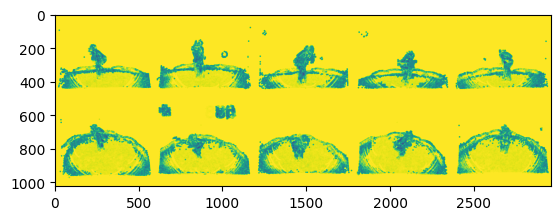

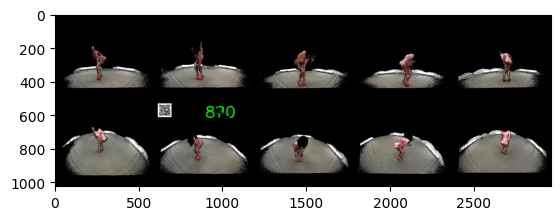

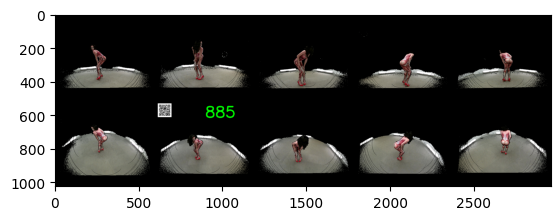

Frame counter: 581, Frame: 641, SSIM: 0.8966848019690706, PSNR: 21.170327148799004, RMSE: 22.28557392254034


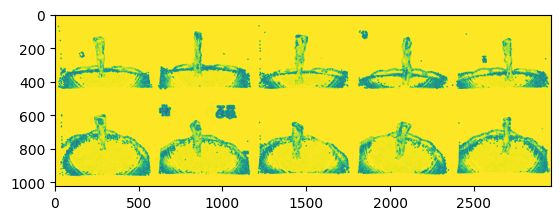

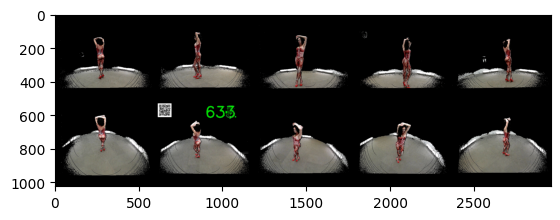

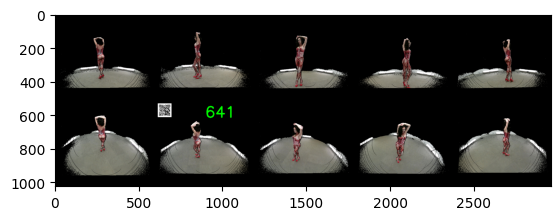

Frame counter: 816, Frame: 876, SSIM: 0.8832807434827162, PSNR: 20.931933737934525, RMSE: 22.90569605216769


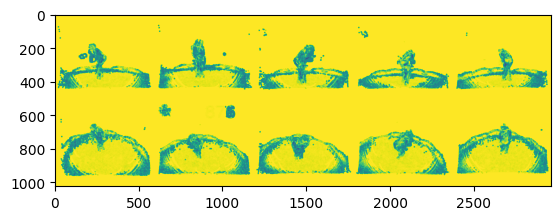

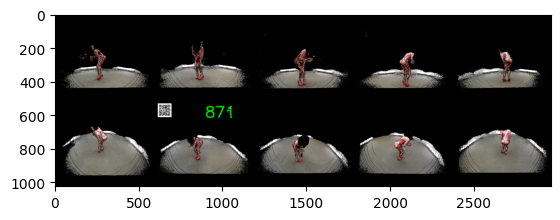

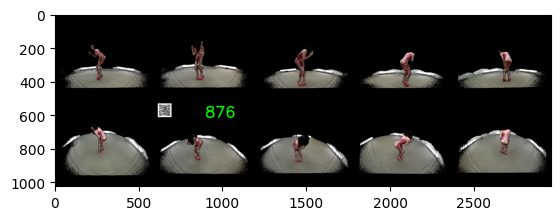

Frame counter: 115, Frame: 175, SSIM: 0.9796917295363058, PSNR: 31.354436841008464, RMSE: 6.899511428910361


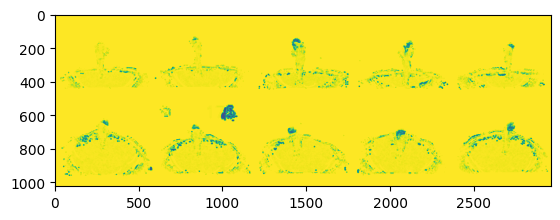

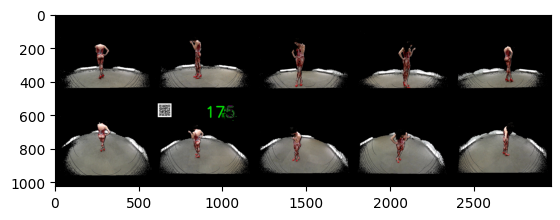

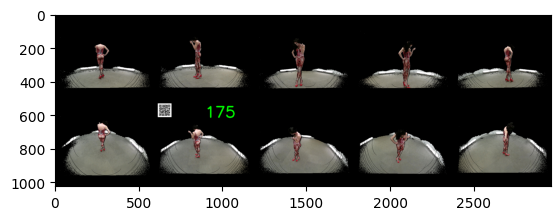

Frame counter: 861, Frame: 921, SSIM: 0.8929748121358473, PSNR: 21.165321536923752, RMSE: 22.29842062999928


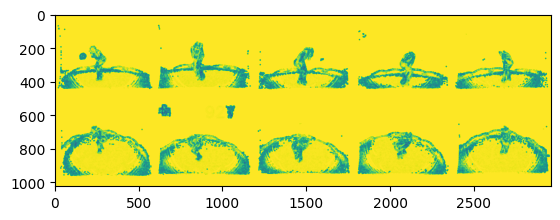

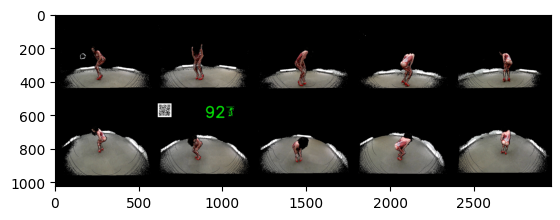

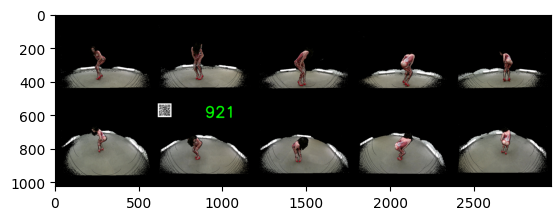

Frame counter: 583, Frame: 643, SSIM: 0.8963036596773335, PSNR: 21.364048232917987, RMSE: 21.794041261477137


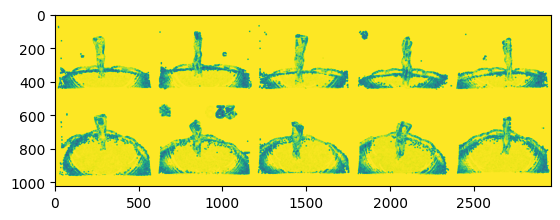

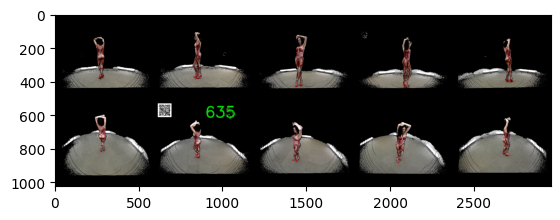

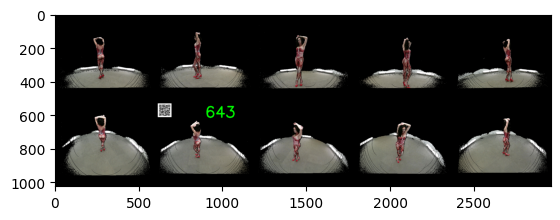

[ WARN:0@315.562] global loadsave.cpp:248 findDecoder imread_('/home/lei/data/KinectStream/panoptic_captures/160317_moonbaby1_with_ground/tiled_gt/1318_color_bgra.png'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [9]:
gt_path = "/home/lei/data/KinectStream/panoptic_captures/160317_moonbaby1_with_ground/tiled_gt/"
rf_path = "/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test/"

onlyfiles = [os.path.join(rf_path, f) for f in os.listdir(rf_path)]
print(onlyfiles[:10])

for file in onlyfiles[:10]:
    rf = cv2.imread(os.path.join(rf_path, file), cv2.IMREAD_UNCHANGED)
    frame_counter = file.split('/')[-1].split('_')[0]
    frame_ID = int(frame_counter) + 60
    gt = cv2.imread(os.path.join(gt_path, "{}_color_bgra.png".format(frame_ID)), cv2.IMREAD_UNCHANGED)

    rf_disp = cv2.cvtColor(rf, cv2.COLOR_BGRA2RGBA)
    gt_disp = cv2.cvtColor(gt, cv2.COLOR_BGRA2RGBA)

    ssim, psnr, rmse, diff = ssim_psnr_rmse(rf, gt)
    print("Frame counter: {}, Frame: {}, SSIM: {}, PSNR: {}, RMSE: {}".format(frame_counter, frame_ID, ssim, psnr, rmse))
    plt.imshow(diff)
    plt.show()
    plt.imshow(rf_disp)
    plt.show()
    plt.imshow(gt_disp)
    plt.show()



['/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/230_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/220_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/280_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/120_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/260_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/210_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/190_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/390_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/360_color_gst.png', '/home/lei/data/pipeline/client_tiled/pipelin

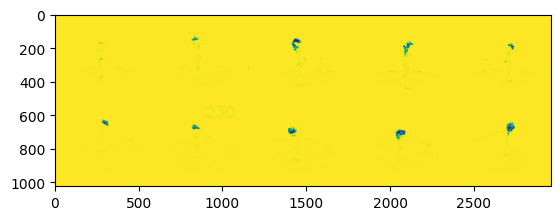

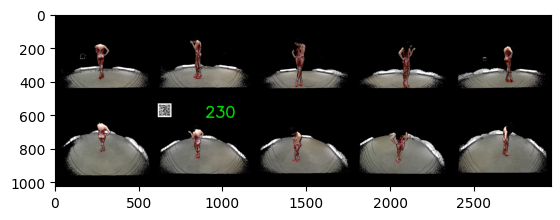

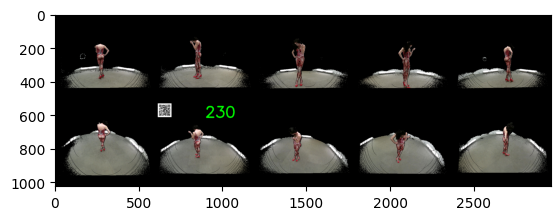

Frame counter: 220, Frame: 220, SSIM: 0.9964197371853089, PSNR: 42.106729056346275, RMSE: 2.0008002252561687


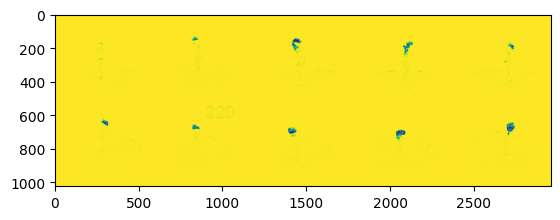

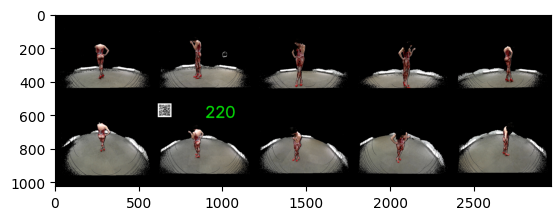

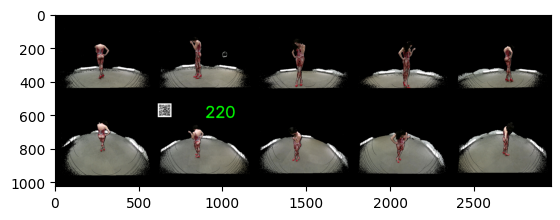

Frame counter: 280, Frame: 280, SSIM: 0.996373801952911, PSNR: 42.05698223177676, RMSE: 2.012292316063241


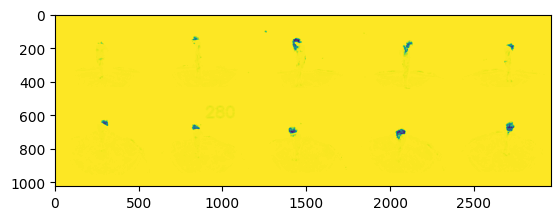

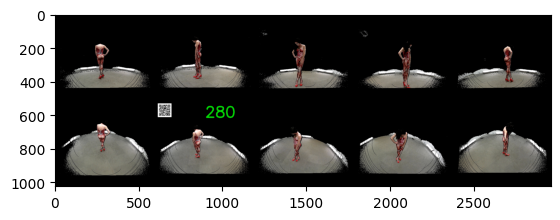

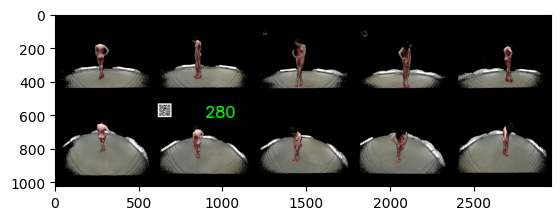

Frame counter: 120, Frame: 120, SSIM: 0.9890516805430218, PSNR: 36.72950436712682, RMSE: 3.715908077577413


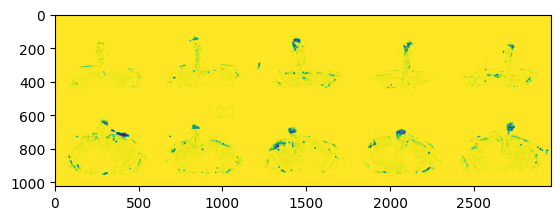

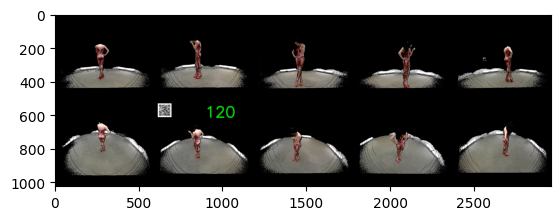

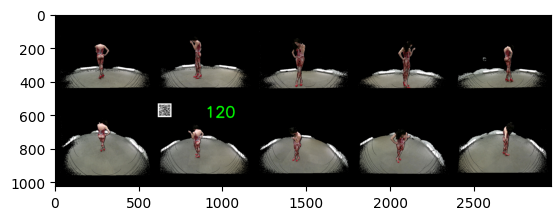

Frame counter: 260, Frame: 260, SSIM: 0.9963724922184901, PSNR: 42.08394792892835, RMSE: 2.0060547602230385


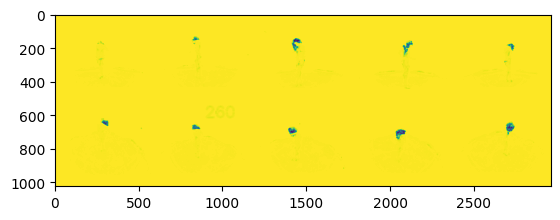

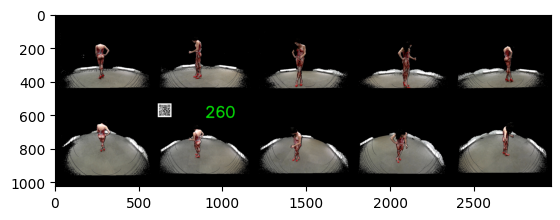

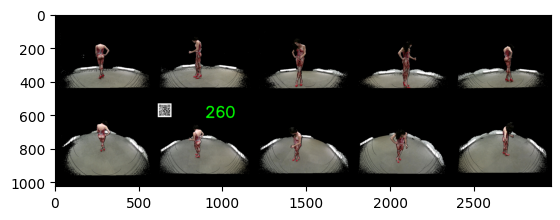

Frame counter: 210, Frame: 210, SSIM: 0.9855442832173081, PSNR: 36.68302082945865, RMSE: 3.7358474936030652


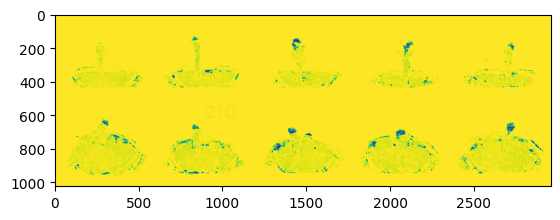

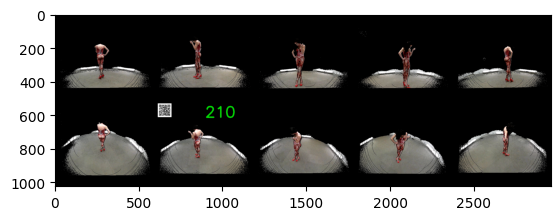

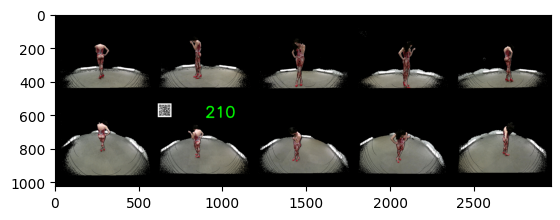

Frame counter: 190, Frame: 190, SSIM: 0.9841171981321661, PSNR: 35.948786272703465, RMSE: 4.065377383746333


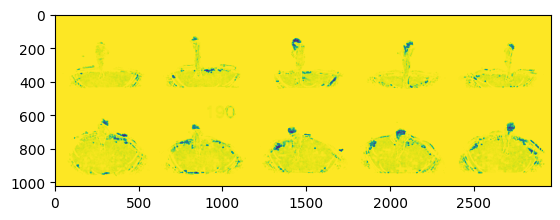

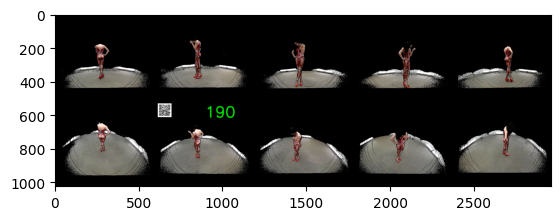

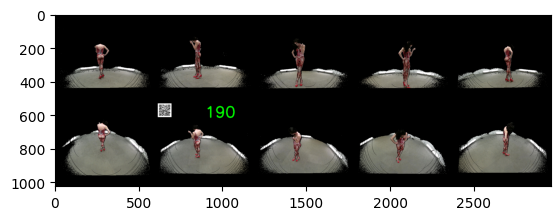

Frame counter: 390, Frame: 390, SSIM: 0.9960959998315907, PSNR: 42.110271038617995, RMSE: 1.9999844937110036


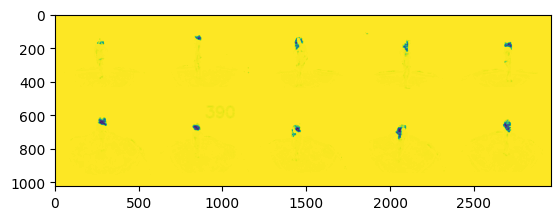

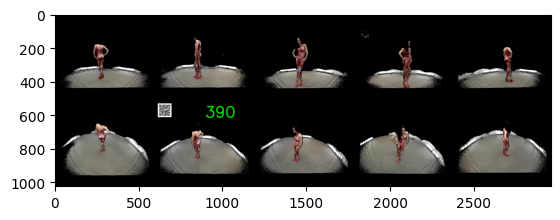

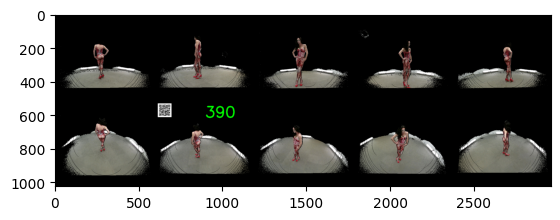

Frame counter: 360, Frame: 360, SSIM: 0.9837021257699822, PSNR: 35.62320887991491, RMSE: 4.220653857508677


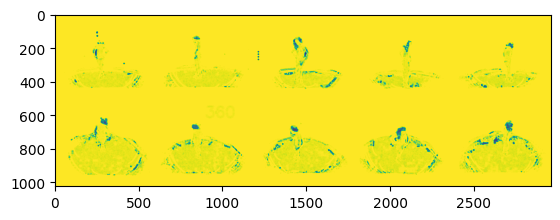

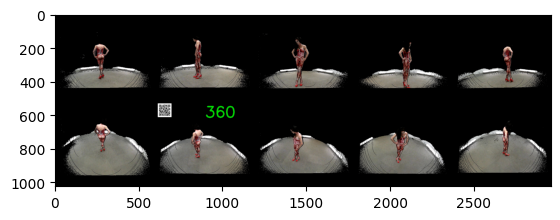

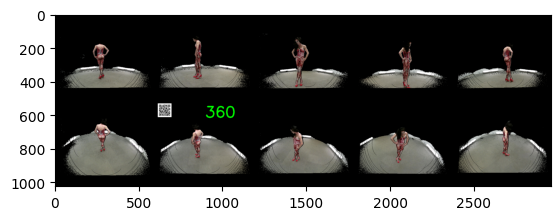

Frame counter: 100, Frame: 100, SSIM: 0.9862354281464312, PSNR: 35.11171172657794, RMSE: 4.4766649777785


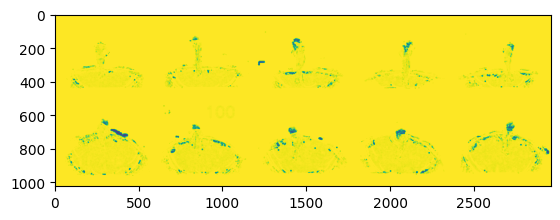

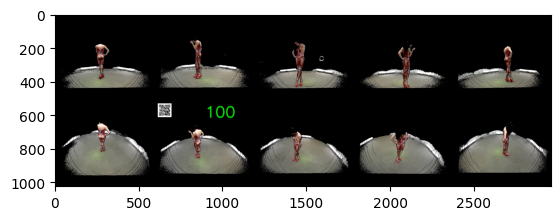

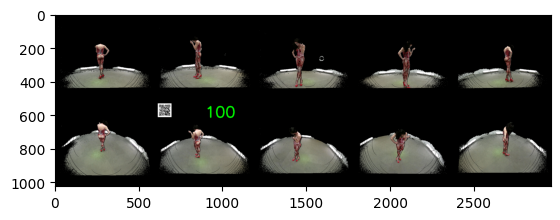

In [5]:
gt_path = "/home/lei/data/KinectStream/panoptic_captures/160317_moonbaby1_with_ground/tiled_gt/"
rf_path = "/home/lei/data/pipeline/client_tiled/pipeline_new/160317_moonbaby1_with_ground/test2/"

onlyfiles = [os.path.join(rf_path, f) for f in os.listdir(rf_path)]
print(onlyfiles[:10])

for file in onlyfiles[:10]:
    rf = cv2.imread(os.path.join(rf_path, file), cv2.IMREAD_UNCHANGED)
    frame_counter = file.split('/')[-1].split('_')[0]
    frame_ID = int(frame_counter)
    gt = cv2.imread(os.path.join(gt_path, "{}_color_bgra.png".format(frame_ID)), cv2.IMREAD_UNCHANGED)

    rf_disp = cv2.cvtColor(rf, cv2.COLOR_BGRA2RGBA)
    gt_disp = cv2.cvtColor(gt, cv2.COLOR_BGRA2RGBA)

    ssim, psnr, rmse, diff = ssim_psnr_rmse(rf, gt)
    print("Frame counter: {}, Frame: {}, SSIM: {}, PSNR: {}, RMSE: {}".format(frame_counter, frame_ID, ssim, psnr, rmse))
    plt.imshow(diff)
    plt.show()
    plt.imshow(rf_disp)
    plt.show()
    plt.imshow(gt_disp)
    plt.show()